# Basic Visualizations for Bicycle Theft Analysis

## Objectives:
- Visualize key insights from the cleaned dataset to understand patterns.
- Generate static and interactive visualizations.
- Explore theft trends by neighborhood, time, and type.

1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

2. Load Data

In [5]:
data_path = '/workspace/bicycle_thefts_berlin/outputs/datasets/cleaned/TrainSetCleaned.csv'  
data = pd.read_csv(data_path)

# Display the first few rows to understand the structure
data.head()

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,2023-05-04,2023-05-03,19,2023-05-04,11,0,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern
1,2023-08-09,2023-08-08,22,2023-08-09,7,0,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern
2,2022-05-02,2022-05-02,16,2022-05-02,16,0,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern
3,2023-10-11,2023-07-02,15,2023-07-03,14,0,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern
4,2022-09-05,2022-09-05,10,2022-09-05,15,0,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern


3. Visualization 1: Theft Counts by Neighborhood

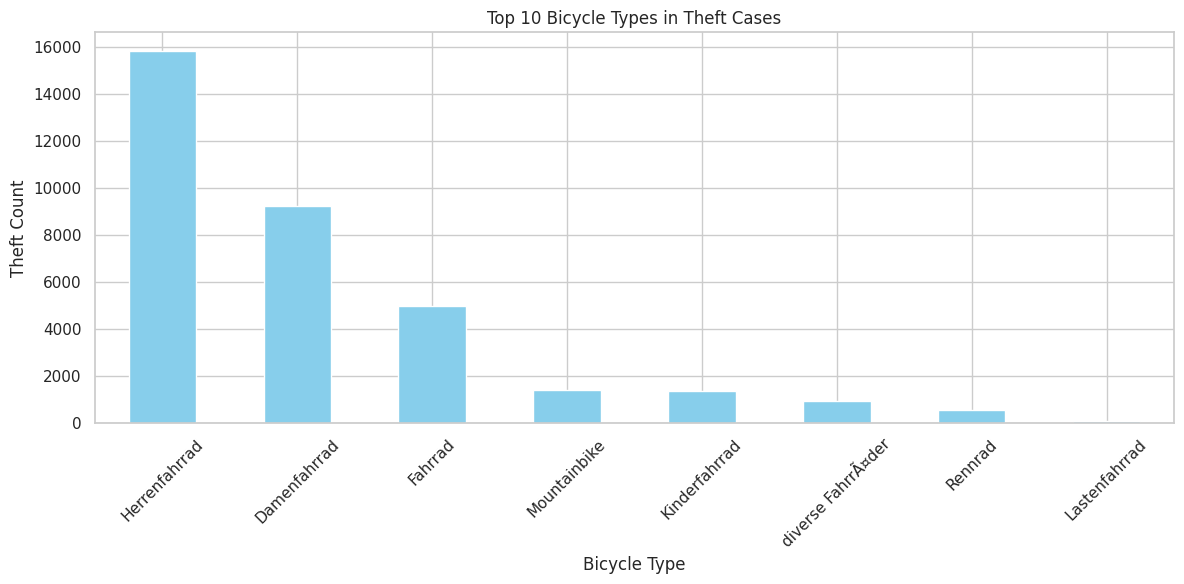

In [12]:
plt.figure(figsize=(12, 6))
counts_by_bike_type = data['ART_DES_FAHRRADS'].value_counts().head(10)
counts_by_bike_type.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bicycle Types in Theft Cases')
plt.xlabel('Bicycle Type')
plt.ylabel('Theft Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Visualization 2: Theft Time Trends (Monthly)

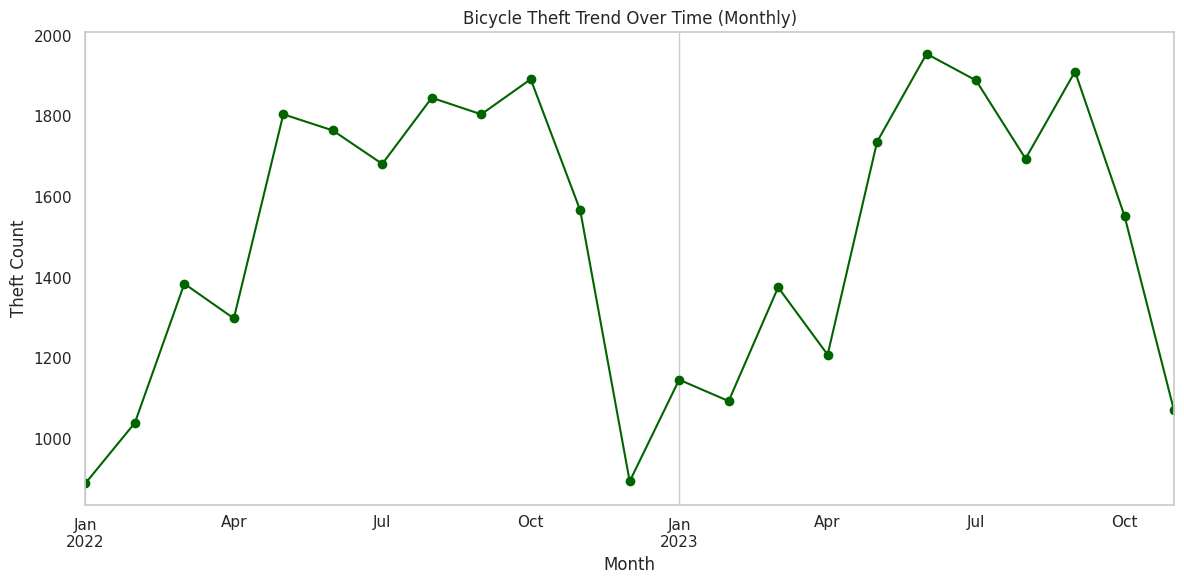

In [13]:
data['ANGELEGT_AM'] = pd.to_datetime(data['ANGELEGT_AM'], errors='coerce')  # Ensure date column is in datetime format
data['Month'] = data['ANGELEGT_AM'].dt.to_period('M')

plt.figure(figsize=(12, 6))
time_trend = data['Month'].value_counts().sort_index()
time_trend.plot(kind='line', marker='o', color='darkgreen')
plt.title('Bicycle Theft Trend Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Theft Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

5. Visualization 3: Most Common Bicycle Types Targeted

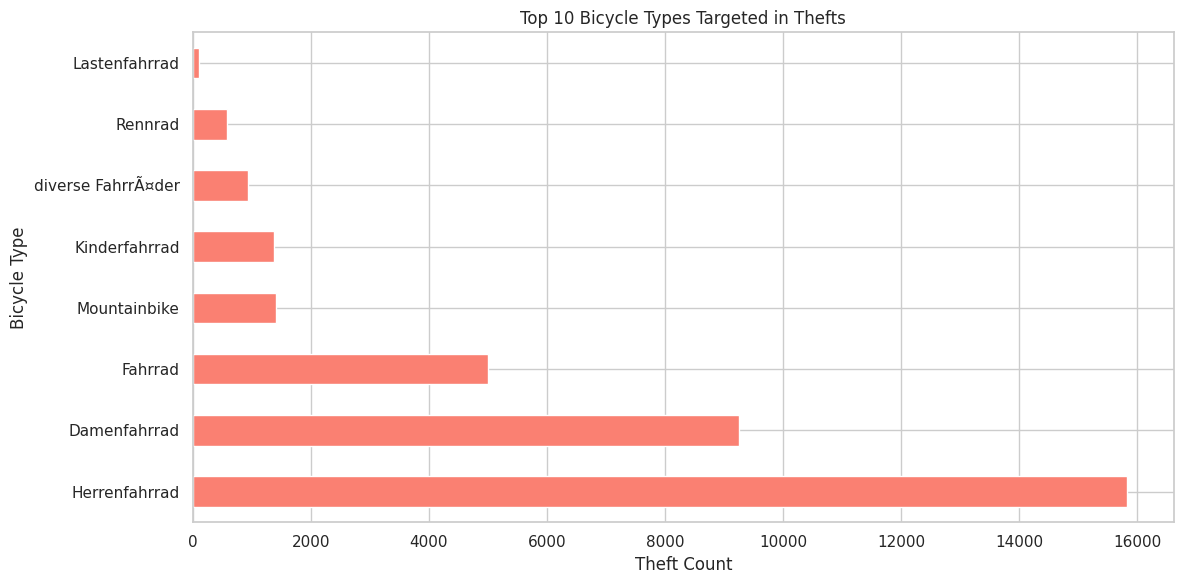

In [14]:
plt.figure(figsize=(12, 6))
bike_types = data['ART_DES_FAHRRADS'].value_counts().head(10)
bike_types.plot(kind='barh', color='salmon')
plt.title('Top 10 Bicycle Types Targeted in Thefts')
plt.xlabel('Theft Count')
plt.ylabel('Bicycle Type')
plt.tight_layout()
plt.show()

6. Interactive Visualization (Optional)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Define the function to filter and plot data based on the selected neighborhood
def filter_and_plot(neighborhood):
    filtered_data = data[data['DELIKT'] == neighborhood]  # Use 'DELIKT' as the new column for filtering
    monthly_trend = filtered_data['Month'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    monthly_trend.plot(kind='line', marker='o', color='purple')
    plt.title(f'Theft Trend for {neighborhood}')
    plt.xlabel('Month')
    plt.ylabel('Theft Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Check if the 'DELIKT' column exists in the data
if 'DELIKT' not in data.columns:
    print("Column 'DELIKT' not found in the data. Please check your dataset.")
    # Optionally, display available columns for troubleshooting
    available_columns = data.columns.tolist()
    print(f"Available columns: {available_columns}")
else:
    # Proceed with the widget if the column exists
    neighborhood_widget = widgets.Dropdown(
        options=data['DELIKT'].unique(),  # Use 'DELIKT' column for neighborhood options
        description='Neighborhood:',
        disabled=False
    )

    # Display the widget and attach the plot function
    widgets.interactive(filter_and_plot, neighborhood=neighborhood_widget)
    display(neighborhood_widget)